Rodney Bongcaron <br>
D212 Data Mining II <br>
April 19, 2022

<h2 style="text-align:center">Performance Assessment: Data Mining II</h2>
<h3 style="text-align:center">Dimensionality Reduction Methods</h3>

### Part I: Research Question
#### A.  Describe the purpose of this data mining report by doing the following:
1. What are the specific groups of customers that have a high churn rate?
2. The objective of the analysis is to find which group of customers have a higher churn rate by analyzing demographic. Knowing this information the business can cater more of their resources for those customers.

### Part II: Technique Justifcation
#### B.  Explain the reasons for using PCA by doing the following:
1. PCA is a technique for transforming high-dimensional data into lower-dimensional data while preserving as much information as feasible. It then analysis the data by summarizing the variance of the components (Cheng, C., 2022, March 22). Included outcomes are that only a few of the principal components are necessary for the analysis.
2.  One assumption about PCA is that all variables should be measured at the interval or ratio level. (O’Rourke, N., n.d.).

### Part III: Data Preparation 
#### C.  Perform data preparation for the chosen dataset by doing the following:
1. The continuous variables being used are the demographic values of the customers. Such Population, Children, Age, Income, etc.

In [342]:
import pandas as pd

In [343]:
df = pd.read_csv('data/churn_clean.csv')
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [374]:
# only using the continuous variables of demographics of customers
df = df[[
         'Population',
         'Children',
         'Age',
         'Income',
         'Tenure',
         'MonthlyCharge',
       ]]

In [375]:
df

Population  Children  Age    Income     Tenure  MonthlyCharge
0             38         0   68  28561.99   6.795513     172.455519
1          10446         1   27  21704.77   1.156681     242.632554
2           3735         4   50   9609.57  15.754144     159.947583
3          13863         1   48  18925.23  17.087227     119.956840
4          11352         0   83  40074.19   1.670972     149.948316
...          ...       ...  ...       ...        ...            ...
9995         640         3   23  55723.74  68.197130     159.979400
9996       77168         4   48  34129.34  61.040370     207.481100
9997         406         1   48  45983.43  47.416890     169.974100
9998       35575         1   39  16667.58  71.095600     252.624000
9999       12230         1   28   9020.92  63.350860     217.484000

[10000 rows x 6 columns]

In [376]:
# Used for standardizing the data
from sklearn.preprocessing import StandardScaler
# For the PCA function
from sklearn.decomposition import PCA

In [377]:
df_std = StandardScaler().fit_transform(df)
print(df_std)

[[-0.67340479 -0.97233791  0.72092524 -0.39877774 -1.04874621 -0.00394256]
 [ 0.04777153 -0.50659192 -1.25995716 -0.64195445 -1.26200116  1.6303259 ]
 [-0.41723753  0.89064606 -0.14873045 -1.07088496 -0.7099398  -0.29522482]
 ...
 [-0.64790585 -0.50659192 -0.24535886  0.21903654  0.48751337 -0.06172934]
 [ 1.78897441 -0.50659192 -0.6801867  -0.82058767  1.38301834  1.86300465]
 [ 0.17138592 -0.50659192 -1.21164295 -1.09176018  1.09012007  1.04467151]]


In [378]:
pca = PCA(n_components = 6)
pc = pca.fit_transform(df_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])
pc_df

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6
0    -0.703232 -0.351092 -0.805155 -0.067595 -1.283028  0.510637
1     0.246312 -1.229465 -1.990753 -0.039978  0.190866 -0.967339
2     0.722683 -0.795473 -0.230401 -0.886908 -0.021047  0.855712
3     0.098727 -1.092213  0.672914 -0.363810 -1.046651 -0.046641
4    -1.058450 -0.594228 -0.063470  0.754093 -1.382156  0.956016
...        ...       ...       ...       ...       ...       ...
9995  1.196794  1.156108  0.453464 -0.622321  0.357107 -1.108579
9996 -0.894694 -2.139180  1.898135  1.653491  3.386571 -1.092716
9997 -0.057234  0.714228 -0.083888 -0.325762 -0.406600 -0.483937
9998 -1.311957 -0.665442 -0.206522 -0.184307  2.162943 -1.748605
9999 -0.385901 -0.215594 -0.462387 -1.229930  0.950703 -1.549181

[10000 rows x 6 columns]

2. Exporting the clean PCA data

In [379]:
pc_df.to_csv('pca_data.csv')

### Part IV: Analysis
#### D.  Perform PCA by doing the following:

In [380]:
import matplotlib.pyplot as plt

1. Below is the matrix of the principal components.

In [381]:
matrix = pd.DataFrame(pca.components_, columns = df.columns, index = pc_df.columns)
print(matrix)

      Population  Children       Age    Income    Tenure  MonthlyCharge
PC 1   -0.227213  0.594463 -0.634963  0.240330 -0.261618      -0.256140
PC 2   -0.566104  0.023429  0.168233  0.555850  0.580582       0.068047
PC 3    0.432480  0.105638  0.090431  0.042719  0.440918      -0.772910
PC 4    0.464736 -0.056701  0.177522  0.780642 -0.356611       0.112775
PC 5    0.423482  0.578999 -0.036957 -0.088426  0.420820       0.546945
PC 6   -0.213413  0.544472  0.726266 -0.119273 -0.309535      -0.143196


2. Using the elbow method below, with a range of 6 components, the graph shows that it starts to bent at 2 components.

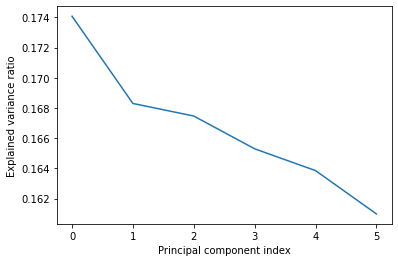

In [382]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

3. The first variance results with 17% of the components and the rest of the components results are 16%.

In [383]:
print(pca.explained_variance_ratio_)

[0.17407967 0.16830307 0.1674709  0.16530059 0.16385678 0.16098898]


4. Below, total variance shows that with even 5 components results with more than 80% of the data, while having 4 components having 67% of the data and 3 components results with 50% of the dataset. 

In [384]:
print(pca.explained_variance_ratio_.cumsum())

[0.17407967 0.34238274 0.50985365 0.67515424 0.83901102 1.        ]


5.  Summary of the analysis.

From the elbow plot of the principal component analysis, it shows that 2 components is the optimal number needed for the analysis. The component variance shows that, for the first component, it had the biggest drop from 17% to 16% for the second component. The rest of the components had a steady drop from 16%. Lastly, the cumulative total of the components showed that 5 out of 6 components retain 83% of the data and that 3 components retain 50% of the data.

<h2 style="text-align:center">References</h2><br>

Dimensionality Reduction in Python. (n.d.). DataCamp. Retrieved April 25, 2022, from <br>
<span style="margin-left:2em">https://www.datacamp.com/users/sign_in?redirect=http%3A%2F%2Fapp.datacamp.com%2Flearn%2Fcourses%2Fdimensionality-reduction-in-python</span>

Cheng, C. (2022, March 22). Principal Component Analysis Explained Visually with Zero Math. Medium. Retrieved April 29, 2022, from<br>
<span style="margin-left:2em">https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d#9b5c</span>

O’Rourke, N. (n.d.). A Step-by-Step Approach to Using SAS® for Univariate & Multivariate Statistics, Second Edition. O’Reilly. Retrieved April 29, 2022, from <br> <span style="margin-left:2em"> https://www.oreilly.com/library/view/a-step-by-step-approach/9781590474174/9781590474174_ch15lev1sec7.html</span>